In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles


/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'AltAz'
resultsDb = db.ResultsDb(outDir=outDir)

##Pointings per year##

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night between 0 and 365
Found 272657 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_0_and_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night between 0 and 365 constraint now.
Plotting complete.
Querying database with constraint night between 365 and 730
Found 239553 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_365_and_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night between 365 and 730 constraint now.
Plotting complete.
Querying database with constraint night between 730 and 1095
Found 232481 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_730_and_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plot

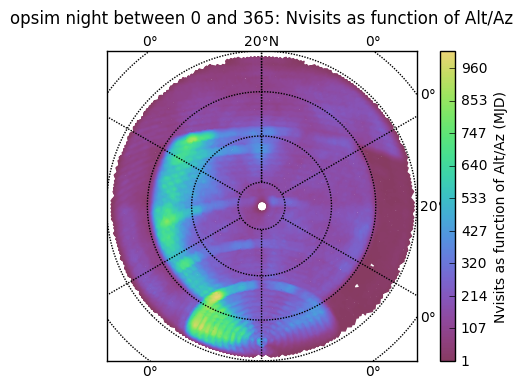

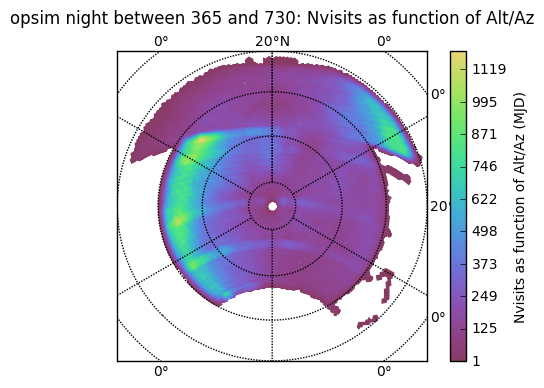

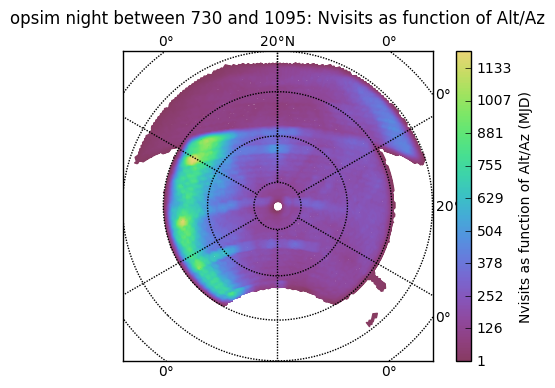

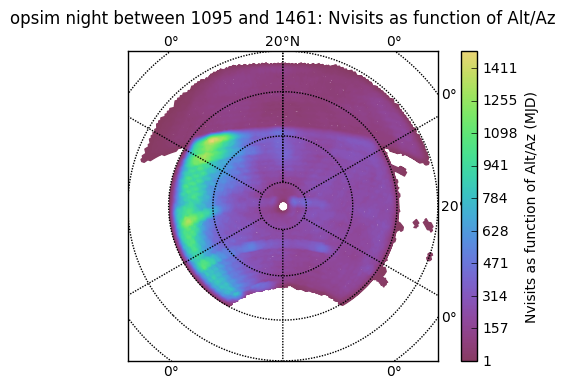

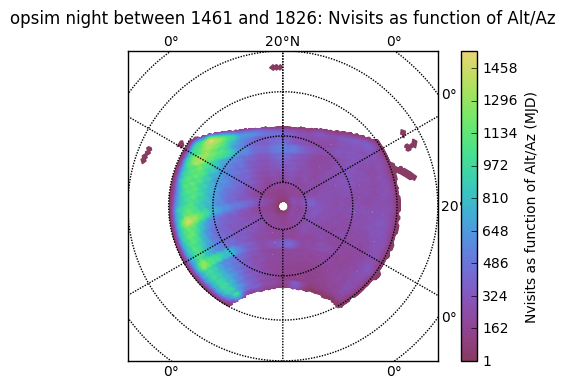

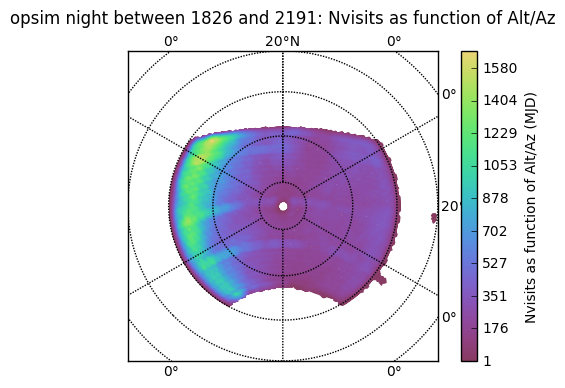

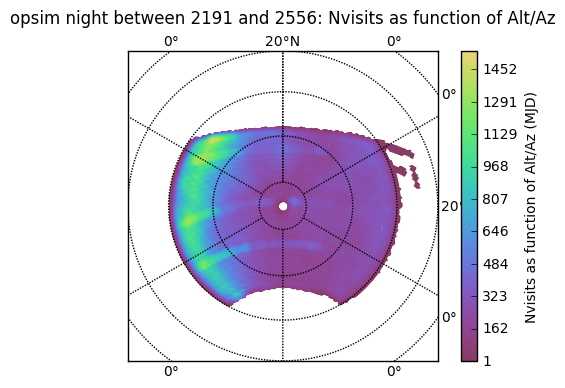

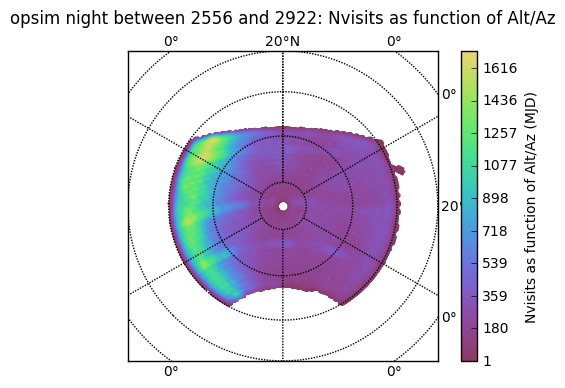

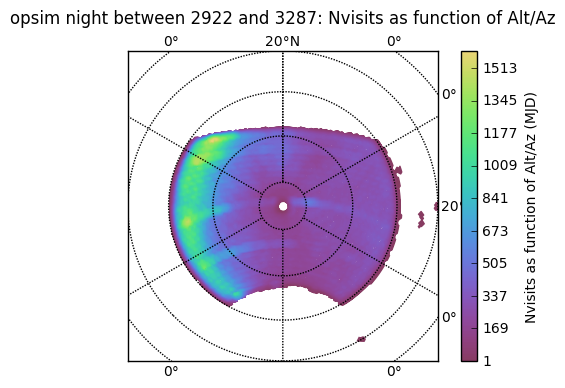

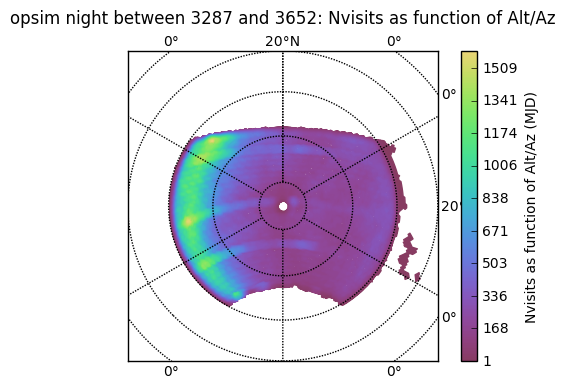

In [3]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {}
nightLimits = np.arange(0,11,1)*365.25
for lowerLimit,upperLimit in zip(nightLimits[:-1],nightLimits[1:]):
    bundleList = []
    plotFuncs = [plots.LambertSkyMap()]
    sql = 'night between %i and %i' % (lowerLimit,upperLimit)
    bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                        plotFuncs=plotFuncs)
    bundleList.append(bundle)
    bDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

##Pointings per month ##

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night % 365.25 between 0 and 30
Found 207982 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_%_365_25_between_0_and_30_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night % 365.25 between 0 and 30 constraint now.
Plotting complete.
Querying database with constraint night % 365.25 between 30 and 60
Found 228400 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_%_365_25_between_30_and_60_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night % 365.25 between 30 and 60 constraint now.
Plotting complete.
Querying database with constraint night % 365.25 between 60 and 91
Found 246517 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_%_365_25_between_60_and_91_HEAL']
Completed metric generation.
Running re

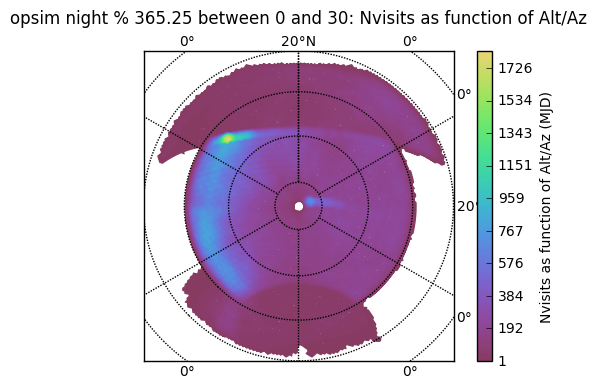

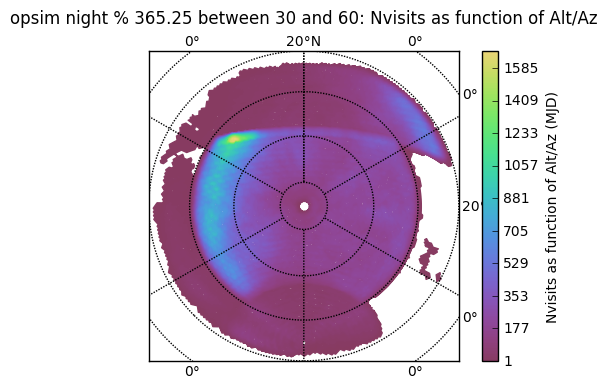

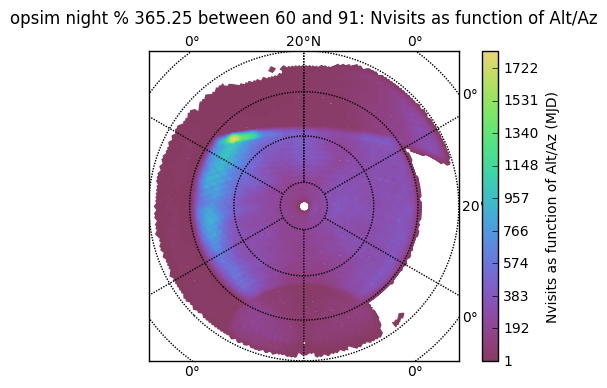

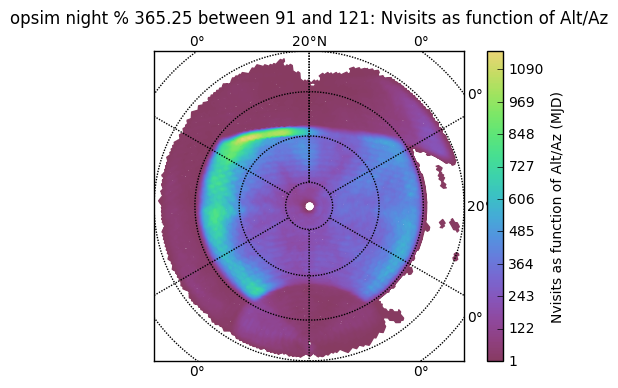

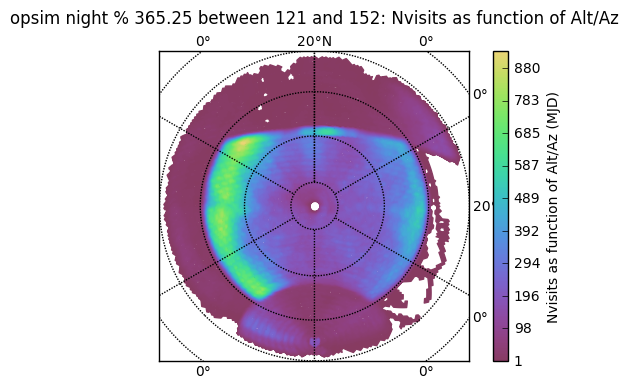

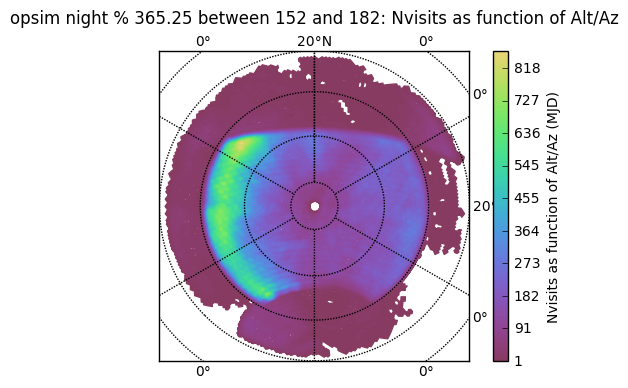

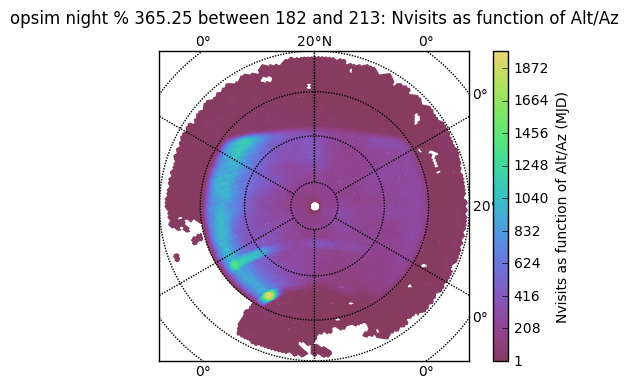

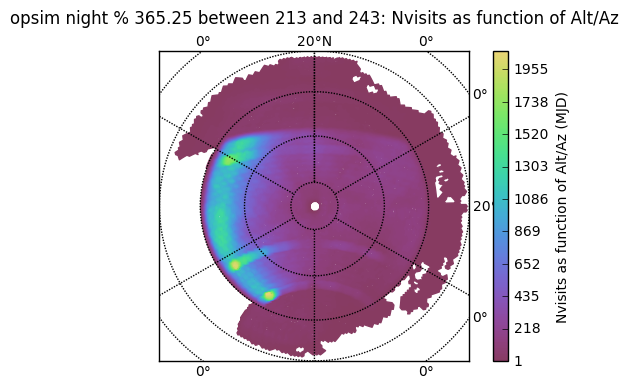

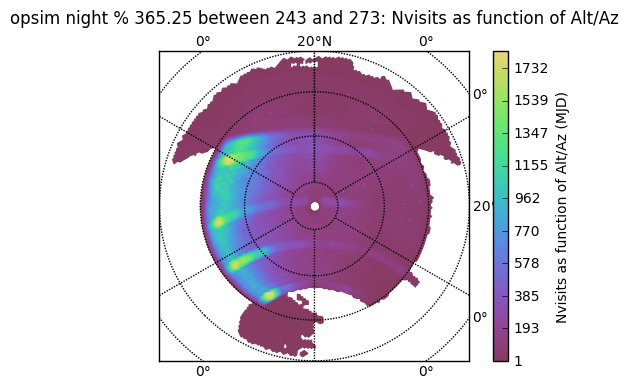

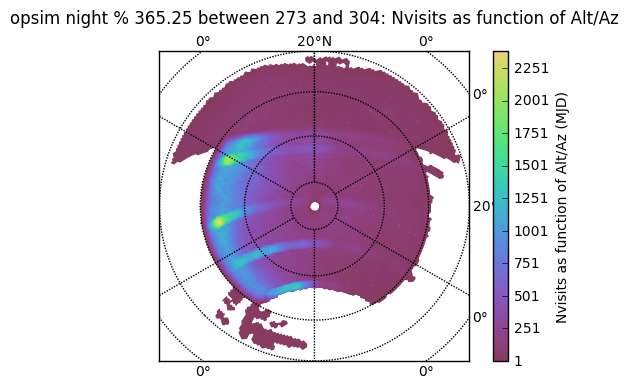

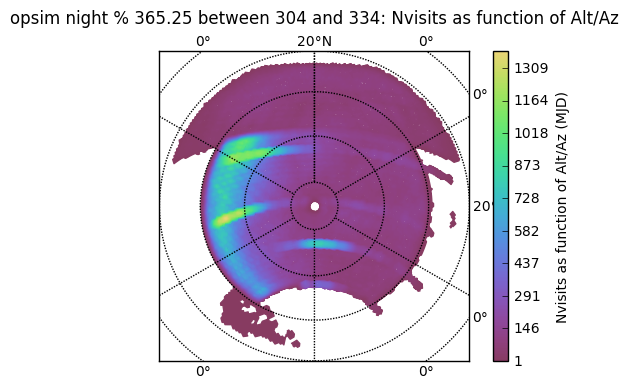

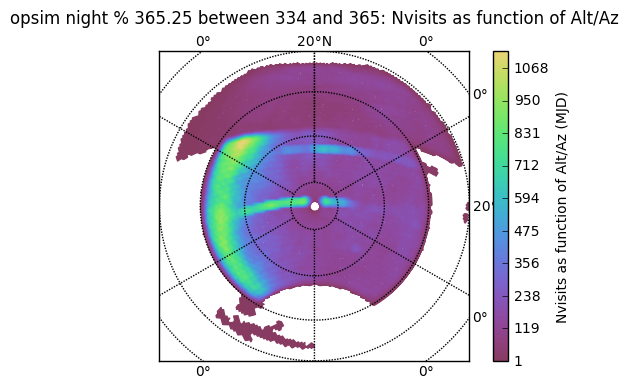

In [4]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {}
months = np.arange(0,365.25+365.25/12, 365.25/12)

for lowerLimit,upperLimit in zip(months[:-1],months[1:]):
    bundleList = []
    plotFuncs = [plots.LambertSkyMap()]
    sql = 'night %% 365.25 between %i and %i' % (lowerLimit,upperLimit)
    bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                        plotFuncs=plotFuncs)
    bundleList.append(bundle)
    bDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

## Pointings every 2 hours of RA##

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint fieldRA between 0.000000 and 0.523599
Found 244220 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_fieldRA_between_0_000000_and_0_523599_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with fieldRA between 0.000000 and 0.523599 constraint now.
Plotting complete.
Querying database with constraint fieldRA between 0.523599 and 1.047198
Found 266400 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_fieldRA_between_0_523599_and_1_047198_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with fieldRA between 0.523599 and 1.047198 constraint now.
Plotting complete.
Querying database with constraint fieldRA between 1.047198 and 1.570796
Found 225325 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_fieldRA_between_1_047198_and_1_570796_HEA

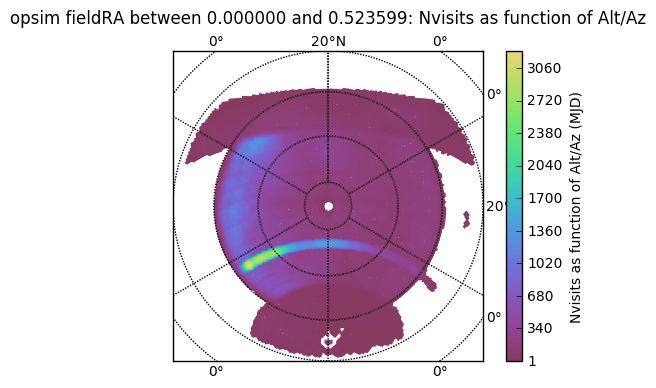

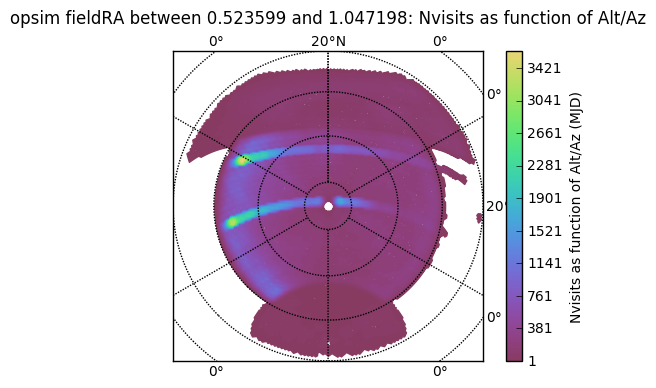

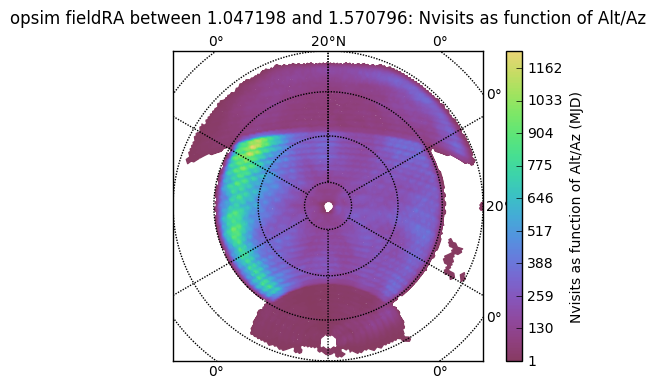

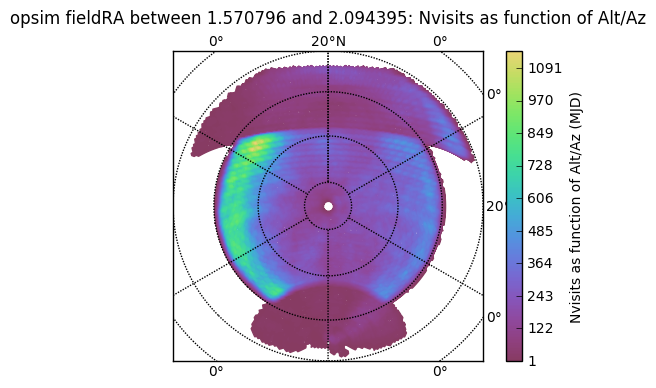

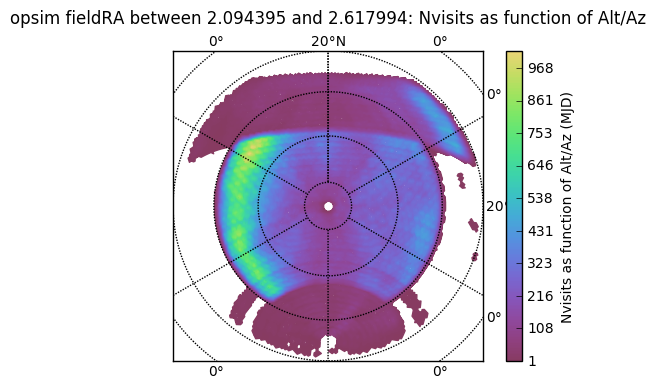

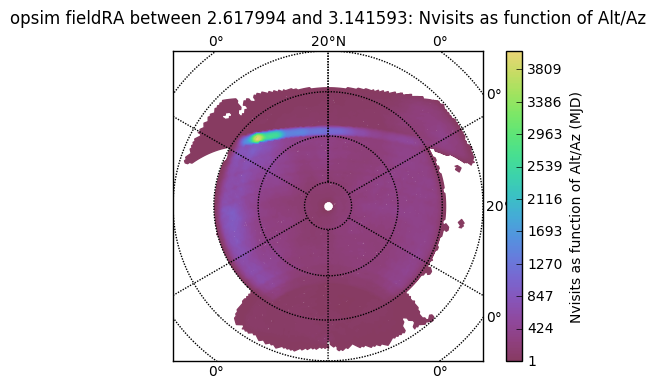

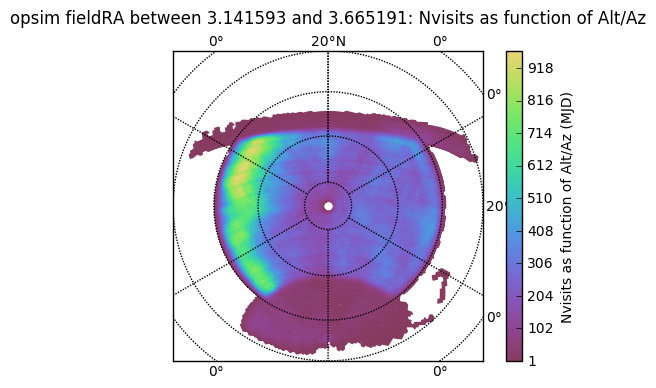

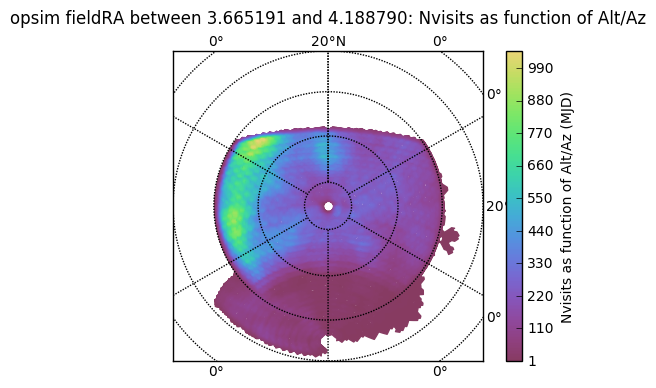

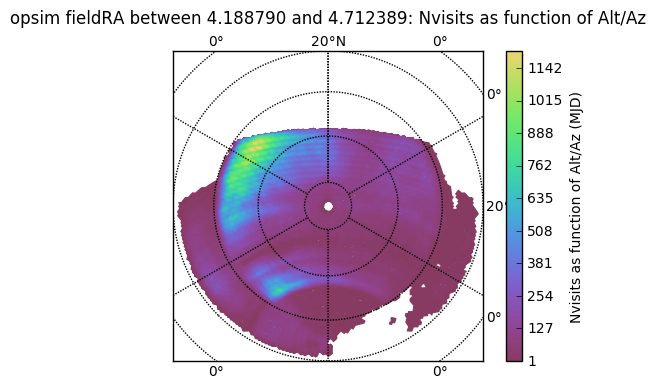

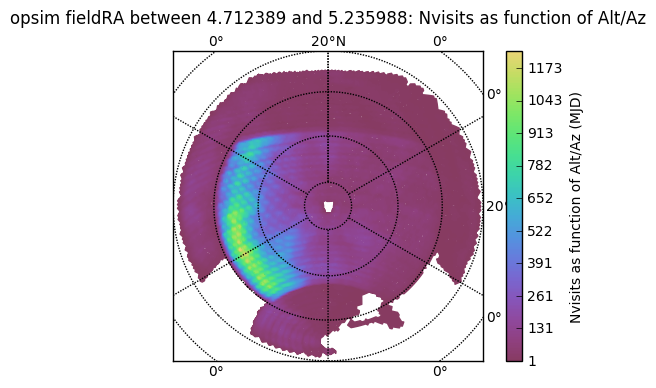

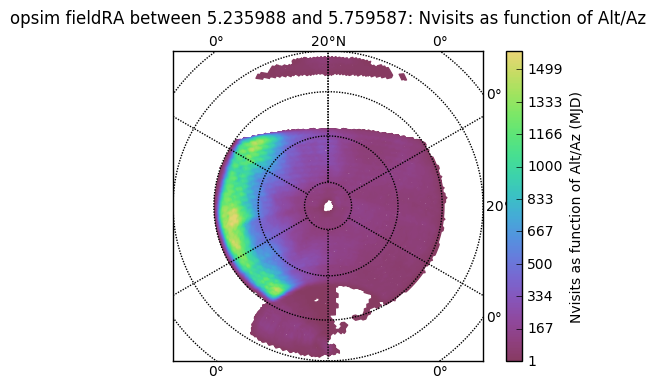

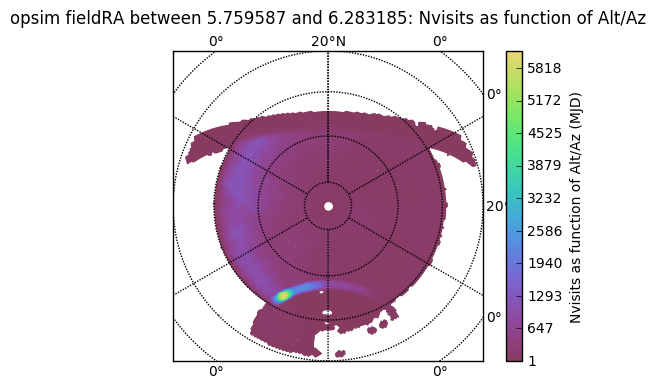

In [5]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {}
ras = np.radians(np.arange(0,24+2, 2)*360./24.)
for lowerLimit,upperLimit in zip(ras[:-1],ras[1:]):
    bundleList = []
    plotFuncs = [plots.LambertSkyMap()]
    sql = 'fieldRA between %f and %f' % (lowerLimit,upperLimit)
    bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                        plotFuncs=plotFuncs)
    bundleList.append(bundle)
    bDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

##Checking before, near, and after midnight##

In [ ]:
# Make a time-to-midnight stacker
from lsst.sims.maf.utils.telescopeInfo import TelescopeInfo
import ephem
from lsst.sims.maf.stackers import BaseStacker

def nearestVal(A, val):
    return A[np.argmin(np.abs(np.array(A)-val))]

class TimeToMidnight(BaseStacker):
    def __init__(self, mjdCol='expMJD', fractionOfNight=False, telescope='LSST'):
        """
        Negative means early in the night, positive means after midnight
        """
        self.fractionOfNight = fractionOfNight
        self.units=['Days']
        self.colsAdded = ['timeToMidnight']
        self.colsReq = [mjdCol]
        self.mjdCol = mjdCol
        self.telescope = TelescopeInfo(telescope)
        
    def _run(self, simData):
        lsstObs = ephem.Observer()
        lsstObs.lat = self.telescope.lat
        lsstObs.lon = self.telescope.lon
        lsstObs.elevation = self.telescope.elev
        S = ephem.Sun()
        
        # Offset of MJD to DJD
        doff = ephem.Date(0)-ephem.Date('1858/11/17')
        nearestMidnight = np.zeros(simData.size,dtype=float)
        for i,mjd in enumerate(simData[self.mjdCol]):
            mjd = mjd-doff
            nearestMidnight[i] = nearestVal([lsstObs.previous_antitransit(S, start=mjd),
                                             lsstObs.next_antitransit(S, start=mjd)], mjd )+doff
        simData['timeToMidnight'] = simData[self.mjdCol] - nearestMidnight
        return simData

In [ ]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
stackers = [TimeToMidnight()]
plotDict = {}


bundleList = []
plotFuncs = [plots.LambertSkyMap()]
sql = '' 
bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                    plotFuncs=plotFuncs, stackerList=stackers)
bundleList.append(bundle)
bDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with no constraint.
Found 2469307 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_HEAL']


/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: PyOS_ascii_strtod and PyOS_ascii_atof are deprecated.  Use PyOS_string_to_double instead.


In [ ]:
allVisits = bgroup.simData.copy()
# Before Midnight
good = np.where(allVisits['timeToMidnight'] < 0)
bundle.plotDict = {'title':'Before Midnight'}
bgroup.runCurrent('', simData=allVisits[good])
bgroup.plotAll(closefigs=False)

#After Midnight
good = np.where(allVisits['timeToMidnight'] > 0)
bundle.plotDict = {'title':'After Midnight'}
bgroup.runCurrent('', simData=allVisits[good])
bgroup.plotAll(closefigs=False)

# Within 2 hours of midnight
good = np.where(np.abs(allVisits['timeToMidnight']) < 2./24.)
bundle.plotDict = {'title':'Within 2 hours of midnight'}
bgroup.runCurrent('', simData=allVisits[good])
bgroup.plotAll(closefigs=False)
